In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

C:\Users\GL62VR\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataframe = pd.read_csv('Hitters.csv', index_col=0).dropna()
train_data = dataframe.drop(['League', 'Division', 'NewLeague'], axis=1)
Y = train_data.Salary
X = train_data.drop(['Salary'], axis=1)

# Generate alphas

In [3]:
alphas = np.logspace(-2,6,100)

# 1.1 Lasso Regression

In [4]:
coefs = []
lasso = Lasso(alpha=None, normalize=True, max_iter=10000)
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X,Y)
    coefs.append(lasso.coef_)
    

## plot

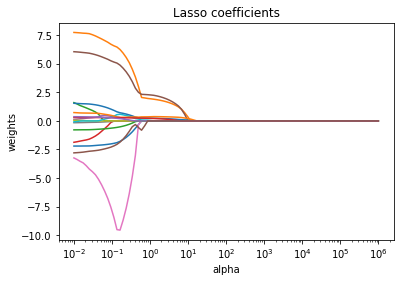

In [5]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients')
plt.axis('tight')
plt.show()

In [6]:
lasso_l3 = Lasso(alpha=10, normalize=True).fit(X, Y)
pd.Series(lasso_l3.coef_, index=X.columns)

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

From the picture, I set alpha=10 and get lasso_l3.coef above, we can know the final three predictors are Hits, CWalks and CRBI

## cross validation

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
lasso_cv = LassoCV(alphas=None, normalize=True, cv=10).fit(X_train, y_train)
lasso.set_params(alpha=lasso_cv.alpha_)
lasso.fit(X_train, y_train)
lasso_r2 = r2_score(y_test, lasso.predict(X_test))
print('Best lasso alpha: ', lasso_cv.alpha_)
print('Best lasso r2-score: ', lasso_r2)

Best lasso alpha:  1.7019495226428258
Best lasso r2-score:  0.5006052224248401


In [8]:
pd.Series(lasso_cv.coef_, index=X.columns)

AtBat      0.000000
Hits       1.850388
HmRun      0.000000
Runs       0.513729
RBI        0.000000
Walks      0.019231
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.273273
CRBI       0.272646
CWalks     0.000000
PutOuts    0.268818
Assists    0.000000
Errors    -0.000000
dtype: float64

There are 6 predictor left.

# 1.2 Ridge Regression

In [9]:
coefs_ridge = []
ridge = Ridge(alpha=None, normalize=True, max_iter=10000)
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, Y)
    coefs_ridge.append(ridge.coef_)


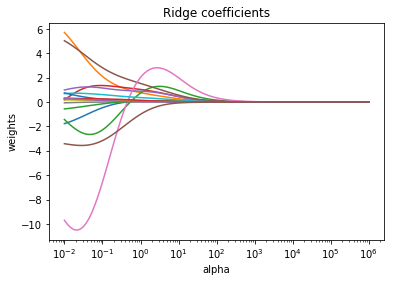

In [10]:
ax = plt.gca()

ax.plot(alphas, coefs_ridge)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients')
plt.axis('tight')
plt.show()

## cross validation 

In [11]:
ridge_cv = RidgeCV(alphas=alphas, normalize=True, cv=10).fit(X_train, y_train)
ridge.set_params(alpha=ridge_cv.alpha_)
ridge.fit(X_train, y_train)
ridge_r2 = r2_score(y_test, ridge.predict(X_test))
print('Best ridge alpha: ', ridge_cv.alpha_)
print('Best ridge r2_score: ', ridge_r2)

Best ridge alpha:  1.0476157527896652
Best ridge r2_score:  0.48696357546579916


In [12]:
pd.Series(ridge_cv.coef_, index=X.columns)

AtBat      0.082878
Hits       0.746190
HmRun      0.830637
Runs       1.018167
RBI        0.715535
Walks      0.817696
Years      3.332668
CAtBat     0.011232
CHits      0.046059
CHmRun     0.281690
CRuns      0.090874
CRBI       0.092468
CWalks     0.055310
PutOuts    0.173498
Assists    0.075707
Errors    -0.835083
dtype: float64

# 2 Short Answer

Bias-variance tradeoff: Because the Total Generalization Error of our models is TGE = Bias + Variance + Irreducible Error. However, if the model have a low bias, its variance should be high. We must find the balance of them to make the sum lower. 

Regularization can prevent overfitting for models and help us reduce the variance, so it can improve the generalization of the model. Like it shows in Lasso regression, many predictors have 0 weights, which means the variance of the model is lowered and overfitting can be prevented, however this can increase the bias of the model, but the r2-score of Lasso is higher than ridge, which shows that Lasso fix the overfitting.